In [2]:
import pandas as pd
import glob
import matplotlib.pyplot as plt

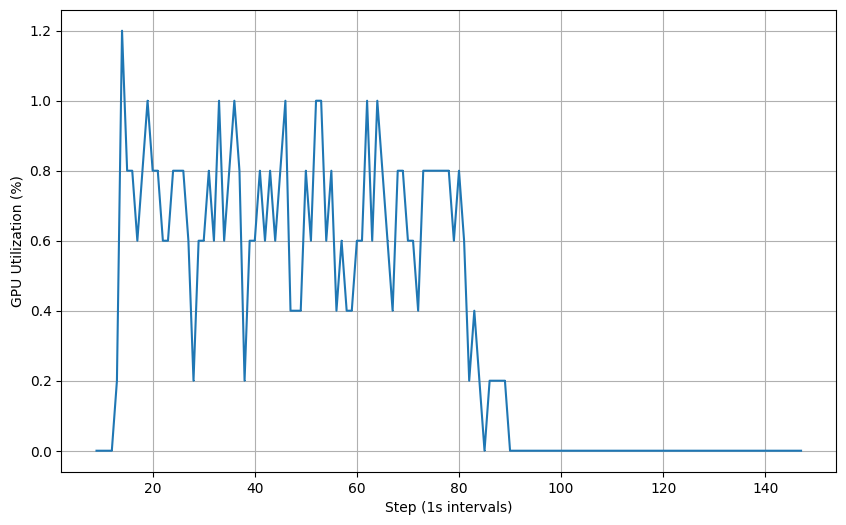

In [6]:
# GPU Utilization GPU

# Load all CSV files
csv_files_gpu = glob.glob("./data/gpu/*resources.csv")

dfs_gpu = [pd.read_csv(file, usecols=["gpu_gpu_0"]) for file in csv_files_gpu]

# clean
for i, df in enumerate(dfs_gpu):
    dfs_gpu[i]["gpu_gpu_0"] = (
        df["gpu_gpu_0"]
        .astype(str)
        .str.replace("%", "", regex=False)
        .replace("", 0)
        .astype(float)
    )


combined_gpu = pd.concat(dfs_gpu, axis=1)
combined_gpu.fillna(0)

means_gpu = combined_gpu.mean(axis=1)

plt.figure(figsize=(10,6))

plt.plot(means_gpu.index, means_gpu, marker=",")

plt.xlabel("Step (1s intervals)")
plt.ylabel("GPU Utilization (%)")
# plt.legend()
plt.grid(True)
plt.show()